<a href="https://colab.research.google.com/github/dataplusplus-ai/Advanced_NLP/blob/main/DistilBERT_from_Huggingface_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is DistilBERT?**

BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications.

DistilBERT is a small, fast, cheap and light Transformer model trained by distilling Bert base. It has 40% less parameters than bert-based models, runs 60% faster while preserving over 95% of Bert’s performances as measured on the GLUE language understanding benchmark.



# **Why DistilBERT?**

Accurate as much as Original BERT Model.

60% faster

40% less parameters

It can run on CPU

Additional Reading on 
DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter

https://arxiv.org/abs/1910.01108

Video Lecture: BERT NLP Tutorial 1- Introduction | BERT Machine Learning | KGP Talkie

https://www.youtube.com/watch?v=h_U27jBNYI4

Ref BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding

https://arxiv.org/abs/1810.04805

Understanding searches better than ever before:

https://www.blog.google/products/search/search-language-understanding-bert/

Good Resource to Read More About the BERT:

http://jalammar.github.io/illustrated-bert/

Visual Guide to Using BERT:

http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/




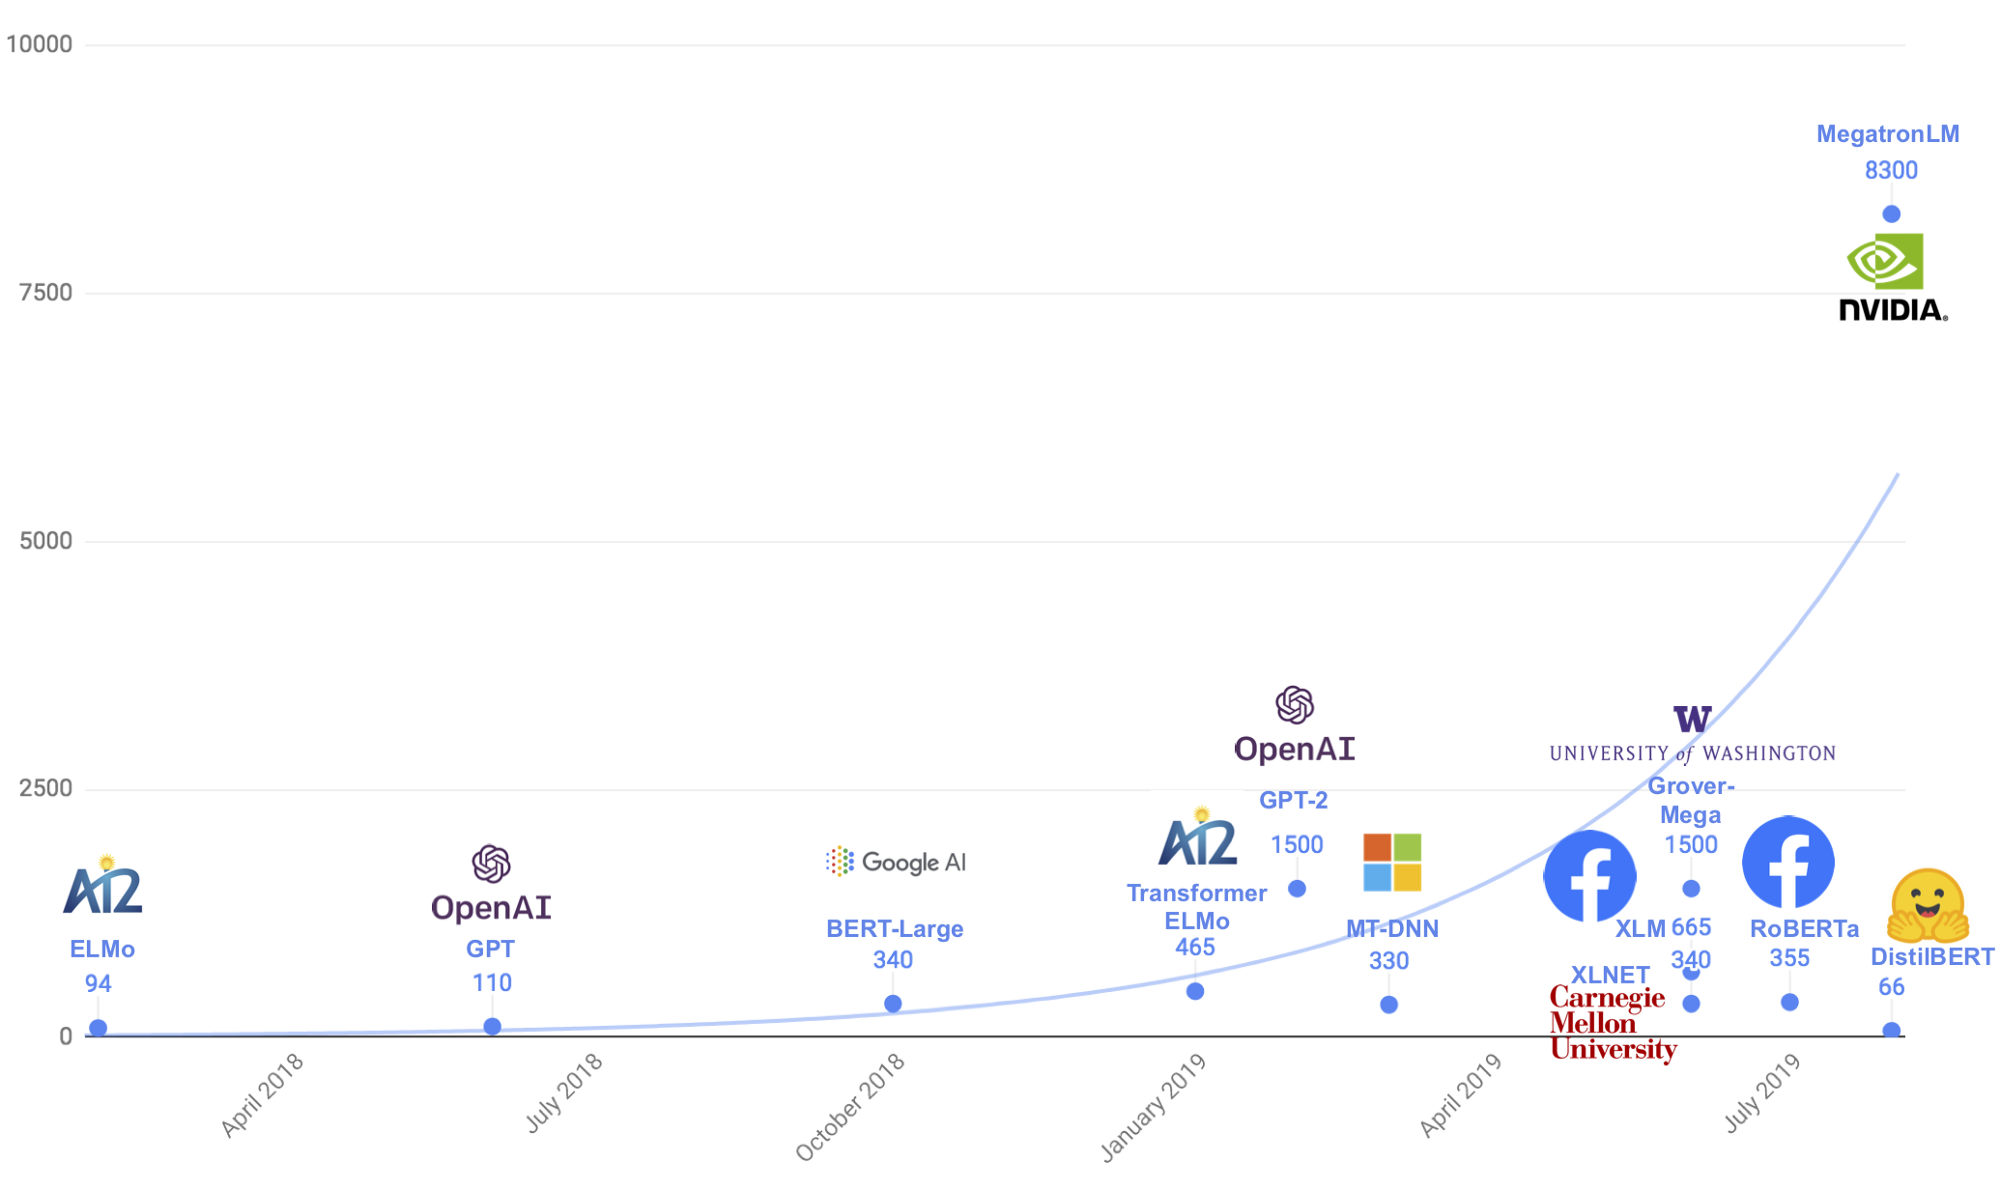

## **What is ktrain?**

ktrain is a library to help build, train, debug, and deploy neural networks in the deep learning software framework, Keras.

ktrain uses tf.keras in TensorFlow instead of standalone Keras.) Inspired by the fastai library, with only a few lines of code, ktrain allows you to easily:

estimate an optimal learning rate for your model given your data using a learning rate finder

employ learning rate schedules such as the triangular learning rate policy, 1cycle policy, and SGDR to more effectively train your model

employ fast and easy-to-use pre-canned models for both text classification (e.g., NBSVM, fastText, GRU with pretrained word embeddings) and image classification (e.g., ResNet, Wide Residual Networks, Inception)

load and preprocess text and image data from a variety of formats

inspect data points that were misclassified to help improve your model

leverage a simple prediction API for saving and deploying both models and data-preprocessing steps to make predictions on new raw data

ktrain GitHub: https://github.com/amaiya/ktrain

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 117kB/s 
     |████████████████████████████████| 6.8MB 41.8MB/s 
     |████████████████████████████████| 983kB 41.7MB/s 
     |████████████████████████████████| 266kB 49.2MB/s 
     |████████████████████████████████| 1.9MB 40.7MB/s 
     |████████████████████████████████| 1.2MB 37.5MB/s 
     |████████████████████████████████| 471kB 43.6MB/s 
     |████████████████████████████████| 3.3MB 42.3MB/s 
     |████████████████████████████████| 901kB 42.4MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.3-cp37-none-any.whl size=25282380 sha256=419366d36a43d786b21fa7420e3a756291d76dc7b77f8f6d99b9f4529291a496
  Stored in directory: /root/.cache/pip/wheels/16/05/be/d6e659b3349016b1059e19fa028f165af4eeae2c196f329112
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=3b955e1ae3c9e491dd85d3ea75dc85b7f84273241476a3f84f4328866acc5716
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

We will use IMDB movie review data set.

In [ ]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
data_test = pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/test.xlsx', dtype= str)
data_train = pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx', dtype = str)

In [ ]:
data_test.sample(5)

,Reviews,Sentiment
14522,<br /><br />It's a generic coming-of-age story...,pos
12491,Forget the campy 'religious' movies that have ...,pos
19322,"I may not have the longest of attention-spans,...",neg
14537,"It's a strange, yet somehow impressive story, ...",pos
4412,I have never seen any of Spike Lee's prior fil...,neg


In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [ ]:
(train, val, preproc) = text.texts_from_df(train_df=data_train, text_column='Reviews', label_columns='Sentiment',
                   val_df = data_test,
                   maxlen = 400,
                   preprocess_mode = 'distilbert')

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0



preprocessing train...
language: en
train sequence lengths:
	mean : 234
	95percentile : 598
	99percentile : 913


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 234
	95percentile : 598
	99percentile : 913


In [ ]:
model = text.text_classifier(name = 'distilbert', train_data = train, preproc=preproc)

Is Multi-Label? False
maxlen is 400



done.


In [ ]:
learner = ktrain.get_learner(model = model,
                             train_data = train,
                             val_data = val,
                             batch_size = 6)

In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs=3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
4167/4167 [==============================] - 1535s 365ms/step - loss: 0.3795 - accuracy: 0.8319 - val_loss: 0.2467 - val_accuracy: 0.9030
Epoch 2/3
4167/4167 [==============================] - 1526s 365ms/step - loss: 0.1856 - accuracy: 0.9306 - val_loss: 0.0744 - val_accuracy: 0.9785
Epoch 3/3
4167/4167 [==============================] - 1527s 365ms/step - loss: 0.0813 - accuracy: 0.9737 - val_loss: 0.0277 - val_accuracy: 0.9940


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.save('/content/drive/My Drive/distilbert')

In [ ]:
data=['Tis movie did not suck',
        'To my utter surprise, movie was ok',
        'To my utter disbelief, movie was ok',
       'To my utter surprise, movie was ok',
        'Do you think movie would  not be good? nah',
       'Do you think movie would be good? nah']

In [ ]:
predictor.predict(data)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg']

In [ ]:
predictor.predict(data, return_proba=True)

array([[0.59127617, 0.40872386],
       [0.5689303 , 0.43106964],
       [0.80739313, 0.19260687],
       [0.5689303 , 0.43106964],
       [0.96913624, 0.0308637 ],
       [0.8551459 , 0.14485411]], dtype=float32)

BERT performs better, but very slow.